# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

# Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
try:
    df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='cp1252')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df2 = pd.read_excel('C:/Users/Admin/Downloads/Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
df=pd.merge (df1,df2) 
print(df[['Country Code','Country']])


      Country Code      Country
0              162  Phillipines
1              162  Phillipines
2              162  Phillipines
3              162  Phillipines
4              162  Phillipines
...            ...          ...
9546           208       Turkey
9547           208       Turkey
9548           208       Turkey
9549           208       Turkey
9550           208       Turkey

[9551 rows x 2 columns]


In [5]:
df.shape

(9551, 22)

#  There is 9551 rows and 22 columns present in the dataset

In [6]:
df.duplicated().sum()

0

#  There is no duplicate value present in the dataset

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

#  Cuisines columns found null value present in the dataset we drop this           

In [8]:
df.dropna(how='any',inplace=True)

In [9]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [10]:
for column in df.columns:
    print(df[column].value_counts)

<bound method IndexOpsMixin.value_counts of 0       6317637
1       6304287
2       6300002
3       6318506
4       6314302
         ...   
9546    5915730
9547    5908749
9548    5915807
9549    5916112
9550    5927402
Name: Restaurant ID, Length: 9542, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                NamlÛ± Gurme
9547               Ceviz AÛôacÛ±
9548                       Huqqa
9549                Aôôk Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9542, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9542, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0   

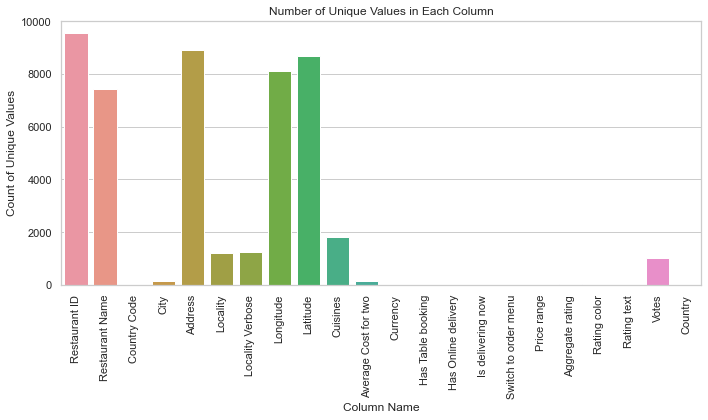

In [11]:
unique = df.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Count of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.tight_layout()
plt.show()

# 
Above the visiluation we can see the unique value to each column
we drop this column is more than 5000 uniqu value 

In [12]:
df.drop(columns=['Restaurant ID','Restaurant Name','Address','Longitude','Latitude'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9542 non-null   int64  
 1   City                  9542 non-null   object 
 2   Locality              9542 non-null   object 
 3   Locality Verbose      9542 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9542 non-null   int64  
 6   Currency              9542 non-null   object 
 7   Has Table booking     9542 non-null   object 
 8   Has Online delivery   9542 non-null   object 
 9   Is delivering now     9542 non-null   object 
 10  Switch to order menu  9542 non-null   object 
 11  Price range           9542 non-null   int64  
 12  Aggregate rating      9542 non-null   float64
 13  Rating color          9542 non-null   object 
 14  Rating text           9542 non-null   object 
 15  Votes                

In [14]:
df.describe()

ColName,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,18.179208,1200.326137,1.804968,2.665238,156.772060
std,56.451600,16128.743876,0.905563,1.516588,430.203324
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,130.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


#  
Country Code: It appears to be a numerical code representing the country associated with the restaurants in the dataset.

Average Cost for two: This represents the average cost in the local currency for two people dining at the restaurant.

Price range: This indicates the price range of the restaurant. It seems to be a categorical variable with values ranging from 1 to 4.

Aggregate rating: This refers to the overall rating of the restaurant. It is a numerical value ranging from 0 to 5.

Votes count: This shows the number of votes or reviews the restaurant has received.

The dataset contains a total of 9542 entries.

Let me know if you have any specific questions or if there's anything else you'd like to know about this data!

# EDA

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

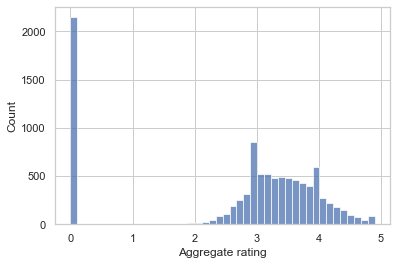

In [15]:
sns.histplot(x='Aggregate rating',data=df)

# 
The average Aggregate rating is 0 in the dataset

0       1094
1        483
2        327
3        244
4        207
        ... 
1616       1
1040       1
5966       1
2224       1
901        1
Name: Votes, Length: 1012, dtype: int64

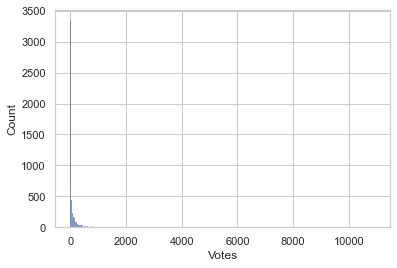

In [16]:
sns.histplot(x='Votes',data=df)
df['Votes'].value_counts()

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

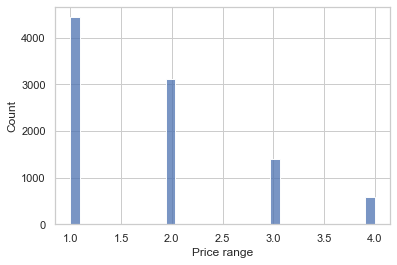

In [17]:
sns.histplot(x='Price range',data=df)
df['Price range'].value_counts()

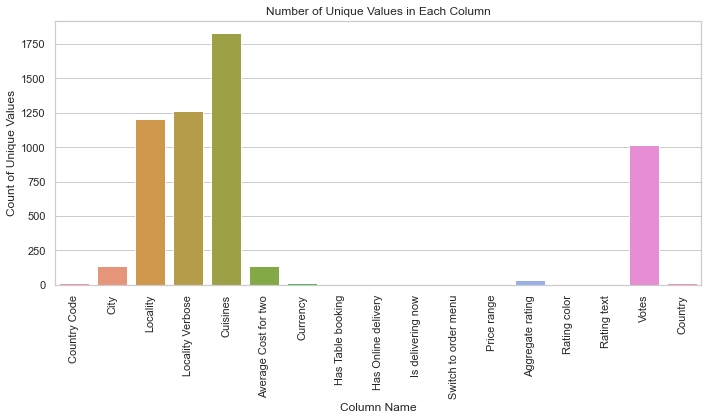

In [18]:
unique = df.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Count of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.tight_layout()
plt.show()

# 
We drop locality ,Locality Verbose,Cuisines of the more unique value in the dataset

In [19]:
df.drop(columns=['Locality','Locality Verbose','Cuisines'],axis=1,inplace=True)

In [20]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

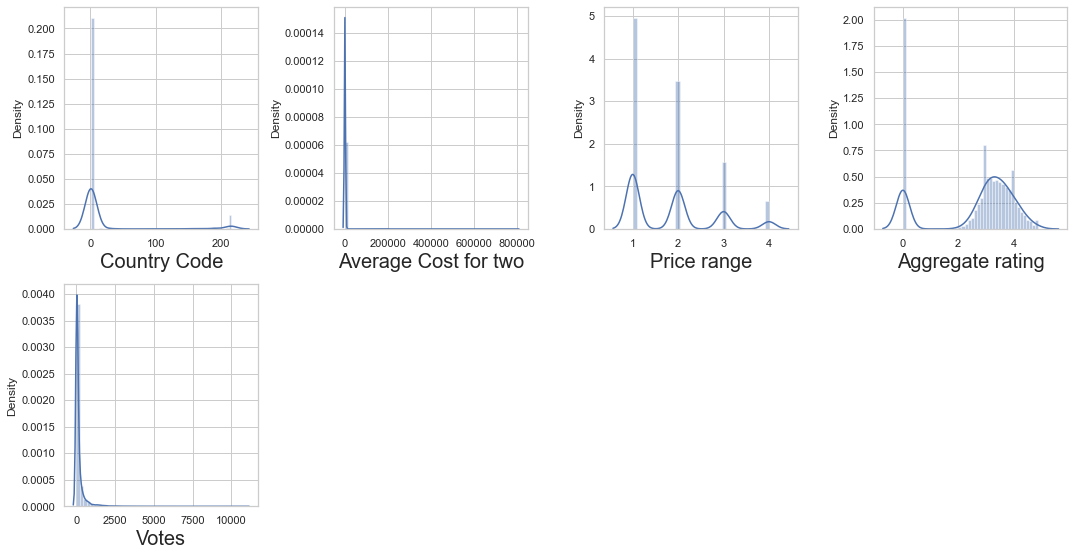

In [21]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    

plt.tight_layout()

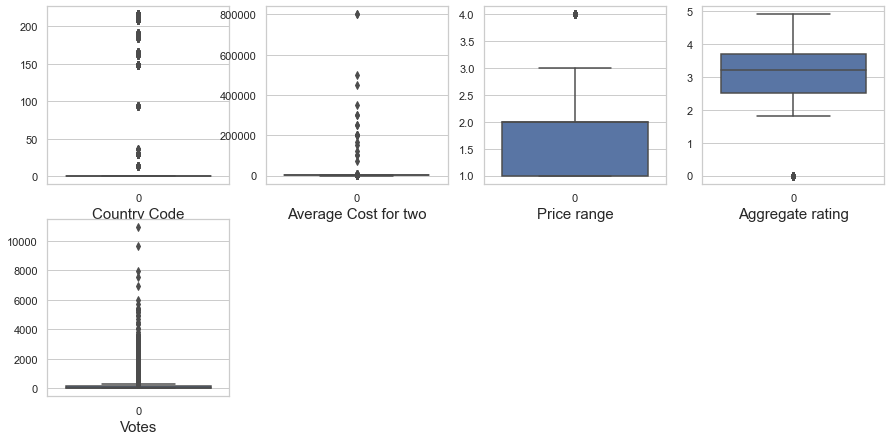

In [22]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


# 
We found outliers present in the dataset but we won't remove outliers

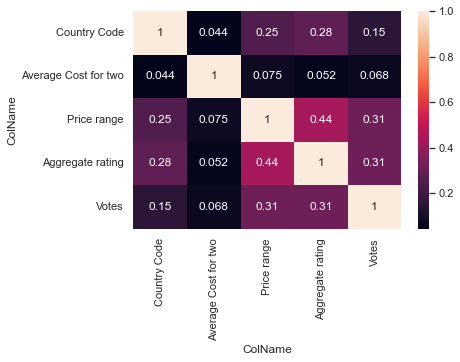

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 
We can see there is no co-relation with each others

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i]=lm.fit_transform(df[i])

In [25]:
df.head()

ColName,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,162,73,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,162,75,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,162,75,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,162,75,1500,0,1,0,0,0,4,4.8,0,1,229,6


In [26]:
x=df.drop(columns=['Average Cost for two','Price range'],axis=1)
z=df['Average Cost for two']
y= df['Price range']

In [27]:
y.value_counts()

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

#  We found classification feature data imbalance but we solve this promblem before build a model

#  we build a regression model build first Average Cost for two predictions

In [28]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [29]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.08416903120498354 at random_state 348


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [33]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.4690596649467975
R2_score on training data:  48.61370120580838
MEAN ABSOLUTE ERROR : 0.5221601367546159
MEAN SQUARED ERROR : 0.41071675590254686
ROOT MEAN SQUARED ERROR : 0.6408718716736964


In [34]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.5428918617062486
R2_score on training data:  59.72820904879046
MEAN ABSOLUTE ERROR : 0.4749507701991537
MEAN SQUARED ERROR : 0.3536027671317339
ROOT MEAN SQUARED ERROR : 0.5946450766059818


In [35]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.49395181087381257
R2_score on training data:  85.25776075445674
MEAN ABSOLUTE ERROR : 0.4787646123631174
MEAN SQUARED ERROR : 0.391461067932312
ROOT MEAN SQUARED ERROR : 0.6256684968354345


In [36]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.4690596649467975
R2_score on training data:  90.346666023236
MEAN ABSOLUTE ERROR : 0.5221601367546159
MEAN SQUARED ERROR : 0.41071675590254686
ROOT MEAN SQUARED ERROR : 0.6408718716736964


In [37]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.29654186929837123
R2_score on training data:  53.20853770624054
MEAN ABSOLUTE ERROR : 0.5724764233321691
MEAN SQUARED ERROR : 0.5441704505763185
ROOT MEAN SQUARED ERROR : 0.7376790972884609


In [38]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.13371923004148267
R2_score on training data:  13.649468162269695
MEAN ABSOLUTE ERROR : 0.6861146520407432
MEAN SQUARED ERROR : 0.6701243135021385
ROOT MEAN SQUARED ERROR : 0.8186112102226175


In [39]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.4690974442764121
R2_score on training data:  53.20853770624054
MEAN ABSOLUTE ERROR : 0.522126535821199
MEAN SQUARED ERROR : 0.410687531142861
ROOT MEAN SQUARED ERROR : 0.6408490704860709


#  CROSS VALIDATION SCORE

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.32923837 0.42909967 0.44575488 0.51305293 0.50480375]
0.44438992042880265
Difference between Accuracy score  and cross validation score is -  0.024669744517994863


In [42]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.32504557 0.48574662 0.51634379 0.5582882  0.523208  ]
0.48172643662007564
Difference between Accuracy score  and cross validation score is -  0.06116542508617295


In [43]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.17007346 0.38426944 0.44205138 0.52709321 0.47695244]
0.4000879849130098
Difference between Accuracy score  and cross validation score is -  0.09386382596080278


In [44]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[-0.48228143  0.07015318  0.21418785  0.3319803   0.1060136 ]
0.04801069878606008
Difference between Accuracy score  and cross validation score is -  0.19465139015800076


In [45]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[-0.1437333   0.22455735  0.21194836  0.23499241  0.28994168]
0.1635412988832196
Difference between Accuracy score  and cross validation score is -  0.13300057041515162


In [46]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[-0.21709893  0.0683931   0.02226287  0.05667482  0.18247379]
0.02254112889788922
Difference between Accuracy score  and cross validation score is -  0.11117810114359346


In [47]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.32921075 0.4291582  0.44569312 0.51290728 0.50492331]
0.44437853130107585
Difference between Accuracy score  and cross validation score is -  0.024718912975336238


# GradientBoostingRegressor is giving 54 accuracy and  19 percent of cross validation score

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
}

gdsv = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [50]:
gdsv.best_params_

{'max_depth': 5, 'n_estimators': 100}

#  Final model Average Cost for two prediction

In [51]:
cost_Final_model= RandomForestRegressor(max_depth= None,n_estimators = 300  )
cost_Final_model.fit(x_train, y_train)
pred = cost_Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

49.460577379400014


In [ ]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

#  We solve data imbalance now we can build a classification model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

#  We drop columns vif score greater than 5 we drop country code columns

In [ ]:
x.drop(columns=['Country Code','Switch to order menu'],axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

#  Price range model build

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

In [ ]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

In [ ]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

In [ ]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

In [ ]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

#  Cross validation score

In [ ]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

In [ ]:
print('RandomForestClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

In [ ]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

In [ ]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

In [ ]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

In [ ]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

#  RandomForestClassifier is giving 69  percent  accuracy and 5 percent of cross validation score¶

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gdsv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gdsv.fit(x_train, y_train)

In [ ]:
gdsv.best_params_

In [ ]:
Final_model= RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=5,n_estimators=100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [ ]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 